# USD-MNT Machine Learning Forecast - EDA

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('C:\\Users\\rober\\.matplotlib\\mpl_configdir\\stylelib\\mds.mplstyle')

import seaborn as sns

In [17]:
df = pd.read_csv('Data/Modified Data/data.csv', thousands=',')

In [18]:
df = df.set_index('Date')

In [19]:
df.head()

,USD,cpi,m2,m1,quasi,circulation,domestic,foreign,current,capital,financial,errors,export,imports,balance,government_balance
Date,,,,,,,,,,,,,,,,
2008-01-31,1171.77,2.0,2307.0,551.9,1755.1,338.5,17.3,13.9,-63.3,18.6,242.7,-147.4,216.5,199.0,17.6,38429.40
2008-02-29,1171.82,2.7,2417.2,549.2,1868.0,310.0,22.1,16.3,-63.3,18.6,242.7,-147.4,433.4,376.1,57.3,55273.47
2008-03-31,1168.17,3.4,2454.8,577.7,1877.0,328.5,20.8,13.8,-63.3,18.6,242.7,-147.4,579.8,599.3,-19.5,57348.37
2008-04-30,1164.94,5.7,2466.3,583.7,1882.6,344.1,21.7,13.9,-130.6,20.1,282.8,-161.4,771.1,864.6,-93.5,48746.80
2008-05-31,1161.37,4.3,2516.2,620.6,1895.6,373.6,18.4,17.1,-130.6,20.1,282.8,-161.4,996.2,1149.6,-153.4,7603.11


In [20]:
df.dtypes

USD                   float64
cpi                   float64
m2                    float64
m1                    float64
quasi                 float64
circulation           float64
domestic              float64
foreign               float64
current               float64
capital               float64
financial             float64
errors                float64
export                float64
imports               float64
balance               float64
government_balance    float64
dtype: object

In [28]:
df = df.fillna(value=0)

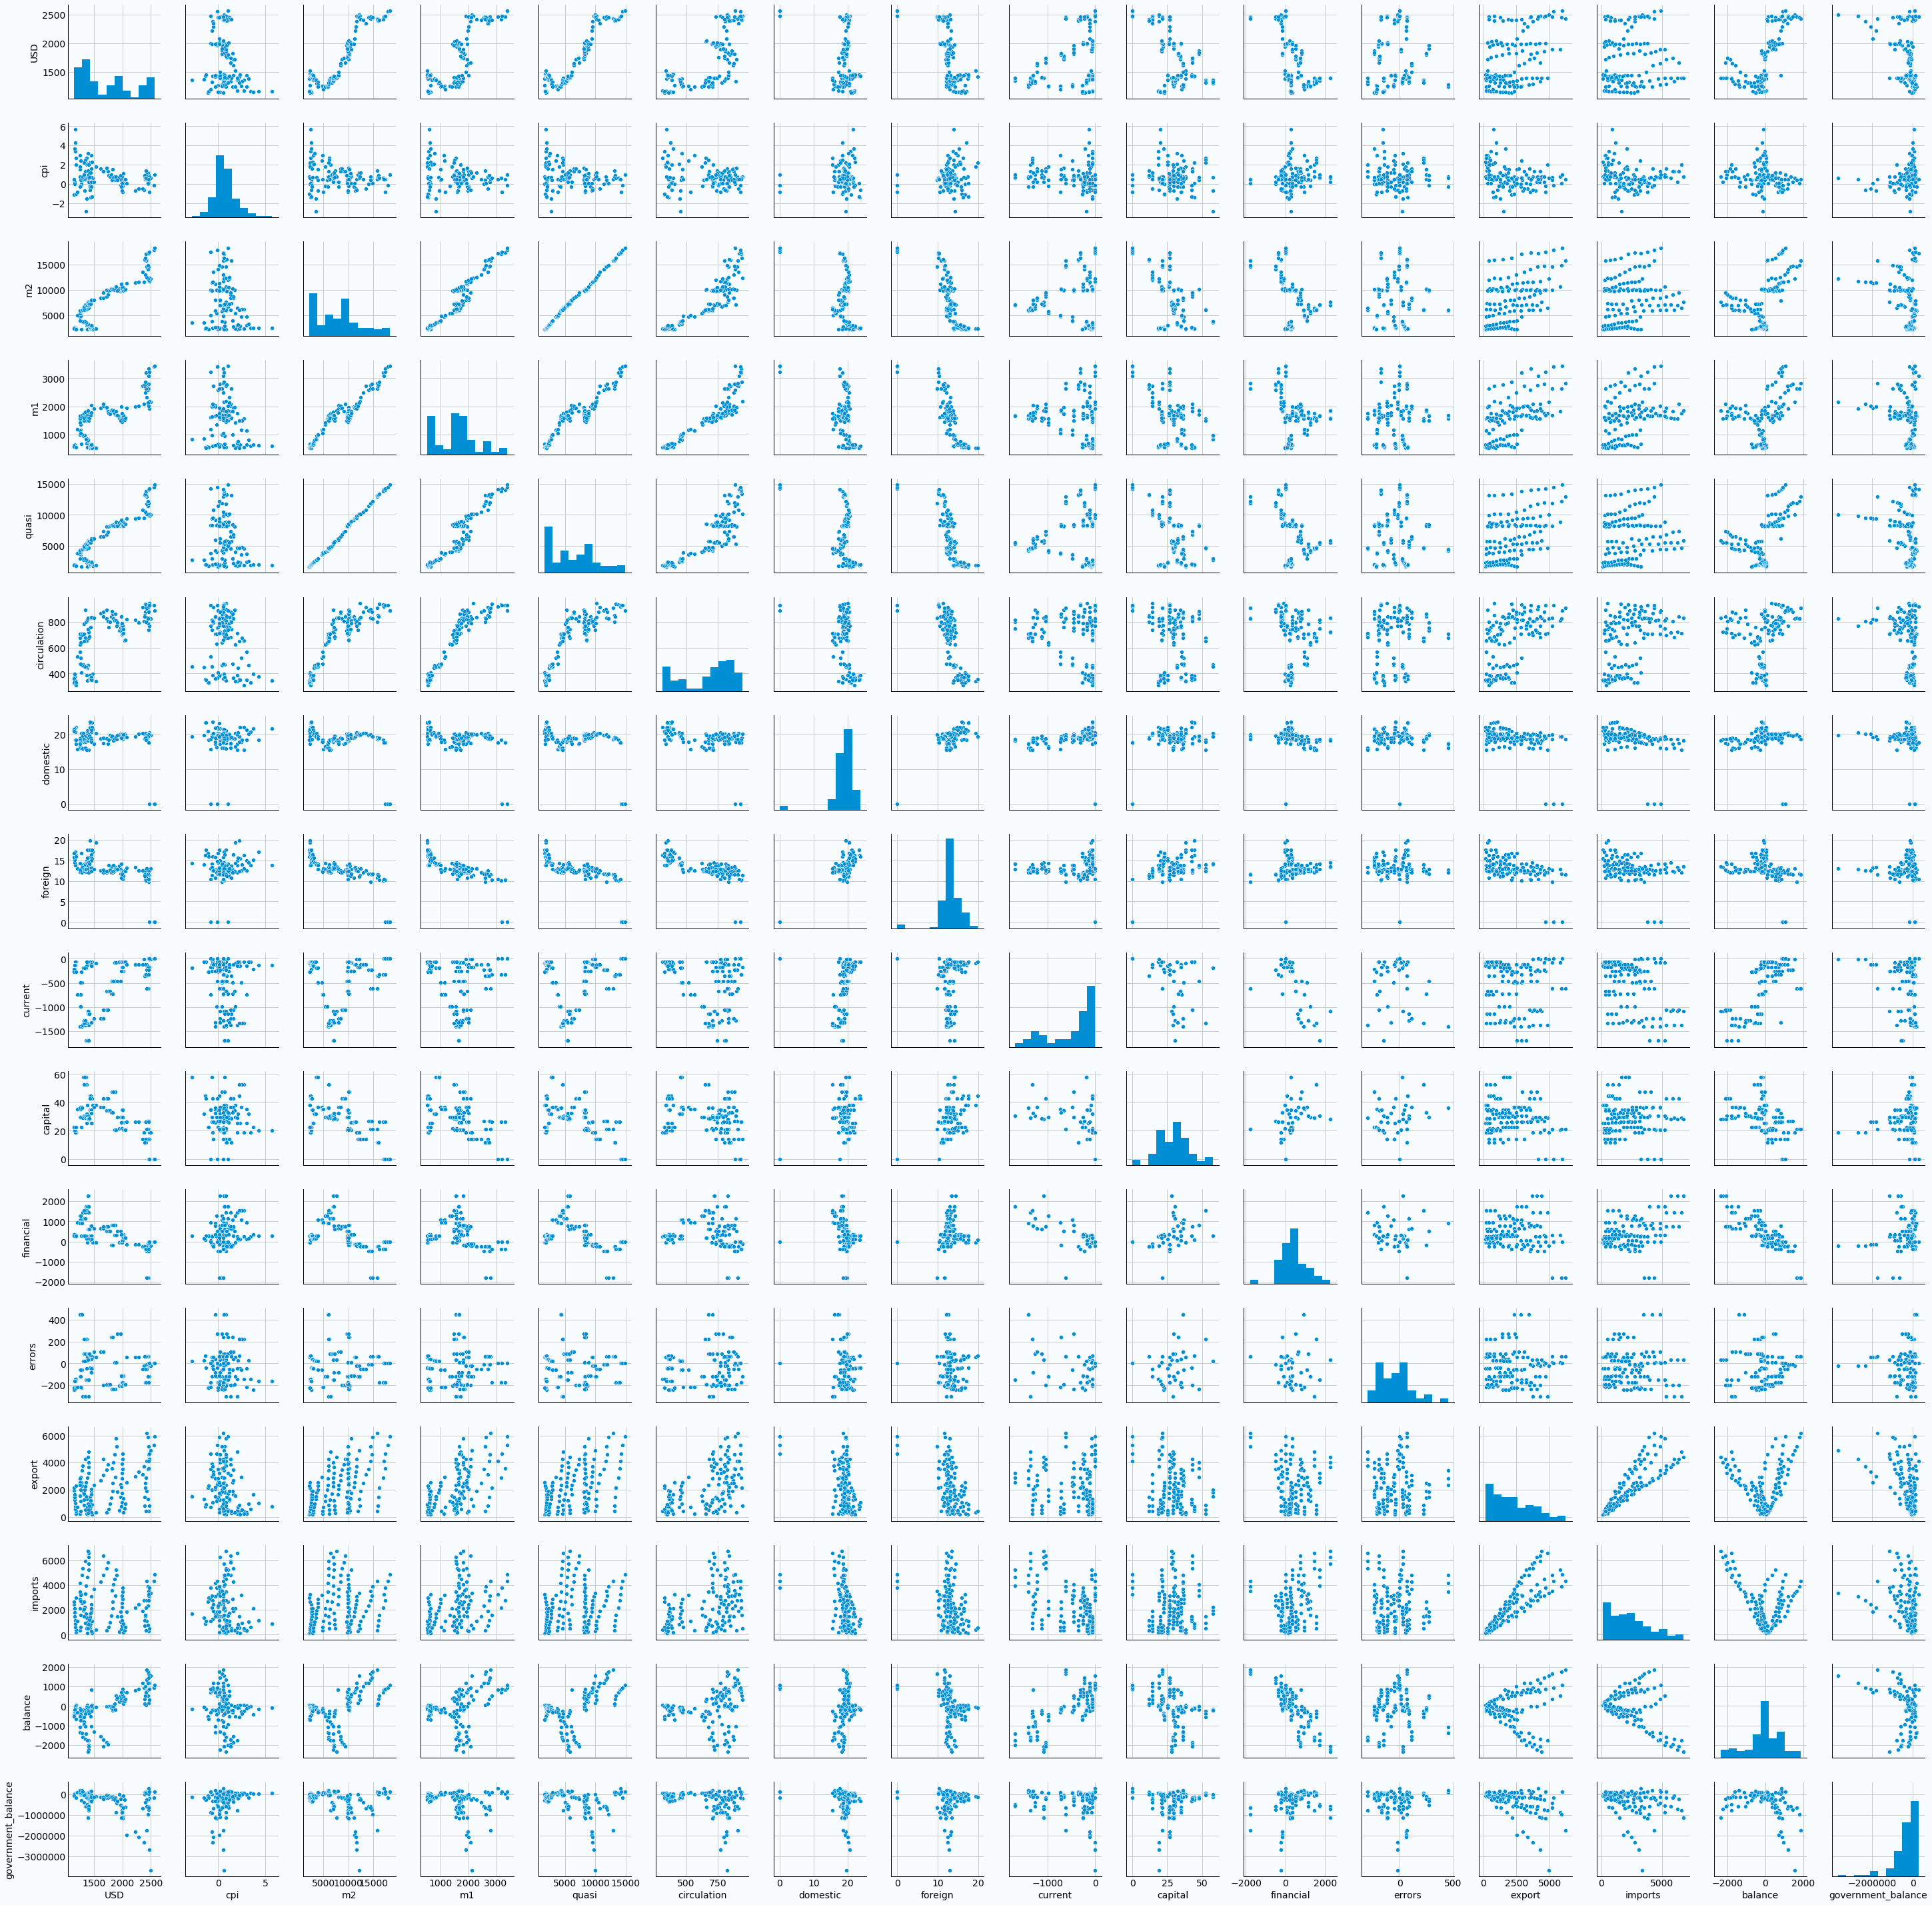

In [29]:
sns.pairplot(df)